## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/500





50000/50000 [==============================] - 15s 290us/step - loss: 2.2594 - acc: 0.1554 - val_loss: 2.2152 - val_acc: 0.1887
Epoch 2/500
50000/50000 [==============================] - 5s 91us/step - loss: 2.1837 - acc: 0.2132 - val_loss: 2.1544 - val_acc: 0.2279
Epoch 3/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.1285 - acc: 0.2464 - val_loss: 2.1059 - val_acc: 0.2547
Epoch 4/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.0842 - acc: 0.2621 - val_loss: 2.0667 - val_acc: 0.2681
Epoch 5/500
50000/50000 [==============================] - 5s 106us/step - loss: 2.0471 - acc: 0.2761 - val_loss: 2.0332 - val_acc: 0.2826
Epoch 6/500
50000/50000 [==============================] - 5s 106us/step - loss: 2.0161 - acc: 0.2871 - val_loss: 2.0044 - val_acc: 0.2932
Epoch 7/500
5000

Epoch 45/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.6942 - acc: 0.4121 - val_loss: 1.7018 - val_acc: 0.4014
Epoch 46/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.6906 - acc: 0.4125 - val_loss: 1.6998 - val_acc: 0.4075
Epoch 47/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.6871 - acc: 0.4123 - val_loss: 1.6951 - val_acc: 0.4078
Epoch 48/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.6836 - acc: 0.4142 - val_loss: 1.6932 - val_acc: 0.4073
Epoch 49/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.6803 - acc: 0.4153 - val_loss: 1.6880 - val_acc: 0.4068
Epoch 50/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.6769 - acc: 0.4162 - val_loss: 1.6848 - val_acc: 0.4081
Epoch 51/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.6739 - acc: 0.4180 - val_loss: 1.6845 - val_acc: 0.4090
Epoch 52/500
50000/50000 [=

Epoch 104/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.5420 - acc: 0.4636 - val_loss: 1.5665 - val_acc: 0.4492
Epoch 105/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.5402 - acc: 0.4636 - val_loss: 1.5667 - val_acc: 0.4494
Epoch 106/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.5384 - acc: 0.4655 - val_loss: 1.5638 - val_acc: 0.4482
Epoch 107/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.5364 - acc: 0.4654 - val_loss: 1.5608 - val_acc: 0.4518
Epoch 108/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.5346 - acc: 0.4659 - val_loss: 1.5634 - val_acc: 0.4448
Epoch 109/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.5327 - acc: 0.4669 - val_loss: 1.5591 - val_acc: 0.4511
Epoch 110/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.5307 - acc: 0.4662 - val_loss: 1.5594 - val_acc: 0.4478
Epoch 111/500
50000/

50000/50000 [==============================] - 4s 83us/step - loss: 1.4450 - acc: 0.4962 - val_loss: 1.4922 - val_acc: 0.4719
Epoch 163/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.4434 - acc: 0.4968 - val_loss: 1.4952 - val_acc: 0.4722
Epoch 164/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.4420 - acc: 0.4967 - val_loss: 1.4901 - val_acc: 0.4788
Epoch 165/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.4405 - acc: 0.4960 - val_loss: 1.4865 - val_acc: 0.4765
Epoch 166/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.4390 - acc: 0.4983 - val_loss: 1.4845 - val_acc: 0.4774
Epoch 167/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.4375 - acc: 0.4976 - val_loss: 1.4873 - val_acc: 0.4730
Epoch 168/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.4362 - acc: 0.4990 - val_loss: 1.4850 - val_acc: 0.4759
Epoch 169/500
50000/50000 [=======

50000/50000 [==============================] - 4s 84us/step - loss: 1.3615 - acc: 0.5260 - val_loss: 1.4368 - val_acc: 0.4946
Epoch 221/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.3603 - acc: 0.5255 - val_loss: 1.4339 - val_acc: 0.4913
Epoch 222/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.3589 - acc: 0.5264 - val_loss: 1.4364 - val_acc: 0.4920
Epoch 223/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.3577 - acc: 0.5259 - val_loss: 1.4331 - val_acc: 0.4895
Epoch 224/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.3565 - acc: 0.5277 - val_loss: 1.4406 - val_acc: 0.4885
Epoch 225/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.3552 - acc: 0.5265 - val_loss: 1.4353 - val_acc: 0.4904
Epoch 226/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.3541 - acc: 0.5281 - val_loss: 1.4320 - val_acc: 0.4897
Epoch 227/500
50000/50000 [=======

50000/50000 [==============================] - 5s 93us/step - loss: 1.2875 - acc: 0.5515 - val_loss: 1.4021 - val_acc: 0.5020
Epoch 279/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.2868 - acc: 0.5507 - val_loss: 1.3940 - val_acc: 0.5059
Epoch 280/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.2852 - acc: 0.5502 - val_loss: 1.4001 - val_acc: 0.5011
Epoch 281/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.2843 - acc: 0.5520 - val_loss: 1.4236 - val_acc: 0.4957
Epoch 282/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.2836 - acc: 0.5515 - val_loss: 1.4049 - val_acc: 0.5025
Epoch 283/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.2818 - acc: 0.5517 - val_loss: 1.4090 - val_acc: 0.4935
Epoch 284/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.2809 - acc: 0.5526 - val_loss: 1.3997 - val_acc: 0.5003
Epoch 285/500
50000/50000 [=======

50000/50000 [==============================] - 5s 91us/step - loss: 1.2199 - acc: 0.5748 - val_loss: 1.3639 - val_acc: 0.5127
Epoch 337/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.2192 - acc: 0.5750 - val_loss: 1.3809 - val_acc: 0.5121
Epoch 338/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.2182 - acc: 0.5752 - val_loss: 1.3662 - val_acc: 0.5140
Epoch 339/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.2172 - acc: 0.5757 - val_loss: 1.3678 - val_acc: 0.5158
Epoch 340/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.2160 - acc: 0.5763 - val_loss: 1.4212 - val_acc: 0.5001
Epoch 341/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.2152 - acc: 0.5750 - val_loss: 1.3777 - val_acc: 0.5124
Epoch 342/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.2135 - acc: 0.5753 - val_loss: 1.3694 - val_acc: 0.5183
Epoch 343/500
50000/50000 [=======

50000/50000 [==============================] - 4s 89us/step - loss: 1.1581 - acc: 0.5959 - val_loss: 1.3688 - val_acc: 0.5167
Epoch 395/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.1552 - acc: 0.5978 - val_loss: 1.3502 - val_acc: 0.5193
Epoch 396/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.1551 - acc: 0.5972 - val_loss: 1.3471 - val_acc: 0.5217
Epoch 397/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.1528 - acc: 0.5977 - val_loss: 1.3617 - val_acc: 0.5176
Epoch 398/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.1532 - acc: 0.5990 - val_loss: 1.3525 - val_acc: 0.5215
Epoch 399/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1506 - acc: 0.5988 - val_loss: 1.3629 - val_acc: 0.5169
Epoch 400/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1516 - acc: 0.5989 - val_loss: 1.3641 - val_acc: 0.5174
Epoch 401/500
50000/50000 [=======

50000/50000 [==============================] - 4s 88us/step - loss: 1.0980 - acc: 0.6161 - val_loss: 1.3703 - val_acc: 0.5195
Epoch 453/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.0954 - acc: 0.6194 - val_loss: 1.3417 - val_acc: 0.5242
Epoch 454/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.0945 - acc: 0.6196 - val_loss: 1.3643 - val_acc: 0.5175
Epoch 455/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.0932 - acc: 0.6181 - val_loss: 1.4003 - val_acc: 0.5076
Epoch 456/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.0914 - acc: 0.6193 - val_loss: 1.3840 - val_acc: 0.5127
Epoch 457/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.0937 - acc: 0.6181 - val_loss: 1.3306 - val_acc: 0.5313
Epoch 458/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.0909 - acc: 0.6214 - val_loss: 1.3617 - val_acc: 0.5234
Epoch 459/500
50000/50000 [=======

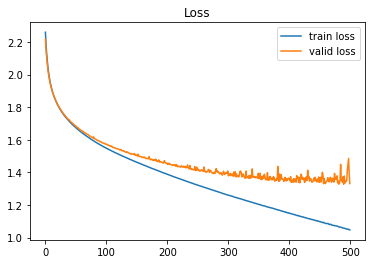

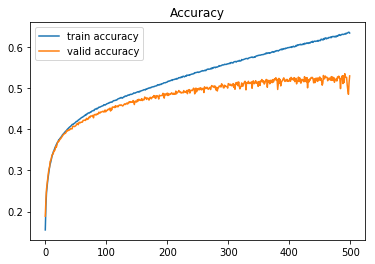

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()